### 3.6 주택 가격 예측: 회귀 문제

boston_housing: 1970년 중반 보스턴 외각 지역의 범죄율, 지방세율 등 데이터

#### 보스턴 주택 가격 데이터셋
앞과 다르게 데이터 포인트 __506개__로 개수가 적고, __404개__는 훈련 샘플, __102개__는 테스트 샘플로 나누어짐.

또한 입력 데이터의 각 특성은 스케일이 달라 0부터 1로만 나타내지는 것이 아닌 1~100의 값을 가지는 것도 있음.

In [2]:
import keras
keras.__version__

'2.2.4'

In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

위에서 말했듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 존재.


또한 13개의 특성을 가지고 있음.

여기서 말하는 13개의 특성은 아래와 같음.

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.
 

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

여기서 나오는 가격은 10,000달러에서 50,000달러 사이 (단위가 1,000달러)

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

특성이 많기 때문에 정규화 작업이 필요함.

물론, 네트워크가 이런 다양한 데이터를 자동으로 맞추려곤 하겠지만, 훈련에 어려움을 가함.

정규화는 특성별로 정규화를 진행하는게 좋음.

평균 값을 이용한 정규화를 진행함.

In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

결과가 평균 값을 가지기 때문에 마지막 층은 1개의 유닛을 가짐.

스칼라 회귀는 활성화 함수가 없음

사용할 손실 함수는 __mse__함수인데, 이 함수는 평균 제곱 오차의 약자로 예측과 타깃 사이 거리의 제곱으로 사용되는데 회귀 문제에서 널리 사용되는 함수임.

In [10]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


#### k-겹 검증

매개변수를 조정하면서, 모델을 평가함.

데이터를 k로 분할하여, k개의 모델로 각각 테스트를 하는 방식

In [9]:
all_scores

[2.0504666118338557, 2.1933807406094994, 2.9195834292043554, 2.413236751414762]

In [11]:
np.mean(all_scores)

2.394166883265618

당연히 모델이 다르고 데이터가 다르므로, 전부 다른 값을 가지게 됨.

4개의 결과를 보면 2.0부터 2.9로 많은 차이를 보임.
평균이 대략 2.39인데 달러로 환산하면 2,390달러, 즉 10,000 ~ 50,000사이의 값 치고는 차이가 심하므로 에포크르 100에서 500으로 증가시켜 훈련을 다시 진행

In [12]:
from keras import backend as K

K.clear_session()

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [14]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [15]:
import matplotlib.pyplot as plt

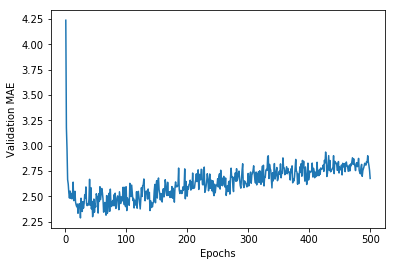

In [16]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

에포크가 0 ~ 100사이 일 때 최소를 찍고 과대적합이 일어나는 것을 볼 수 있음.

하지만 보기 불편하므로 다음과 같은 조건을 추가하여 그래프를 다시 그림

- 첫 데이터 10개 제거 (차이가 심하므로)
- 각 포인트를 이전 포인트의 평균으로 대체

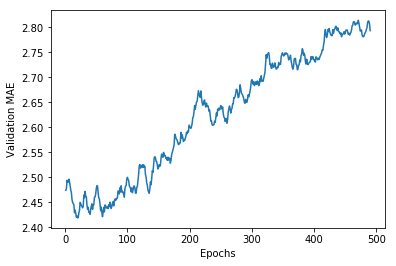

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

대략 80번째부터 줄어드는 것이 멈추었으니, 과대적합이 일어난다 볼 수 있음.

따라서 모든 훈련 데이터를 사용하고, 최상의 매개 변수로 최정 실전에 투입될 모델을 훈련 시키려고 함.

In [18]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 763us/step


In [19]:
test_mae_score

2.685985668032777

2,685달러 정도 차이나는데, 이유가 안나와 있어서 모르겠음.